In [7]:
import pandas as pd
import numpy as np
import matplotlib.colors as mc # For the legend
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from sklearn.preprocessing import MinMaxScaler

from data_functions import plot_data, drop_columns_with_few_non_nulls

Income from STATS CAN Table 11-10-0065-01

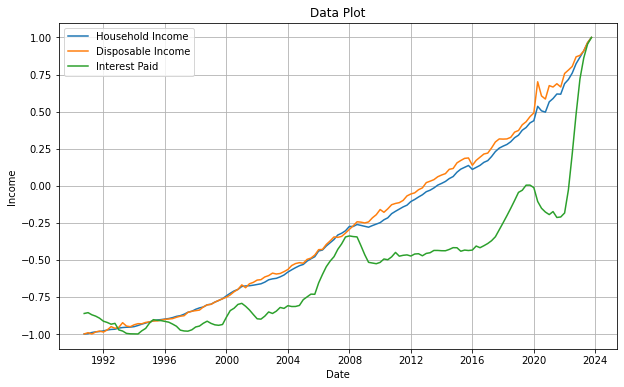

In [8]:

df1 = pd.DataFrame(pd.read_csv("../cfpr_datasets/STATSCAN_Income.csv", encoding= 'unicode_escape', skipfooter=10, on_bad_lines='skip', engine='python'))
df1 = df1.dropna(how="all")
df1 = df1.loc[11:] 
df1 = drop_columns_with_few_non_nulls(df1, threshold=5)
df1 = df1.rename(columns={df1.columns[0]: 'Date'})

# Function to convert quarter-year string to datetime
def quarter_to_date(quarter_year):
    quarter, year = quarter_year.split()
    year = int(year)
    
    quarter_start_month = {
        'Q1': 1,  # January
        'Q2': 4,  # April
        'Q3': 7,  # July
        'Q4': 10  # October
    }
    
    start_month = quarter_start_month[quarter]
    # Create a date string that can be parsed by pd.to_datetime
    date_str = f"{year}-{start_month}-01"

    return pd.to_datetime(date_str, format='%Y-%m-%d')

df1['Date'] = df1['Date'].apply(quarter_to_date)

# df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1 = df1.set_index('Date')

for col in df1.columns:
    df1[col] = df1[col].str.replace(',', '')
    df1[col]=pd.to_numeric(df1[col])

scaler = MinMaxScaler(feature_range=(-1, 1))
df1 = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index=df1.index)

def plot_data(data, y_label, legend_labels=None):

    # Check if legend_labels is a list and convert it to a dictionary
    if isinstance(legend_labels, list):
        if len(legend_labels) != data.shape[1]:
            raise ValueError("Length of legend_labels list must match the number of columns in data.")
        legend_labels = dict(zip(data.columns, legend_labels))
    
    # Initialize the plot
    plt.figure(figsize=(10, 6))
    
    if isinstance(data, pd.Series):
        plt.plot(data.index, data, label=legend_labels if legend_labels else data.name)
    else:
        for column in data.columns:
            column_label = legend_labels.get(column, column) if legend_labels else column
            plt.plot(data.index, data[column], label=column_label)
    
    # Set labels and title
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.title('Data Plot')
    
    # Show the legend
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with custom legend labels
custom_legend_labels = ['Household Income', 'Disposable Income', 'Interest Paid']
plot_data(df1, "Income", legend_labels=custom_legend_labels)